# 01. Logistic Regression — 從數學到 PyTorch

## 0. Notebook Header
- 作者：Paul Yang
- 目的：作為深度學習學習系列的第二章
- 學會什麼：Softmax、Numpy、PyTorch

## 1. Logistic Regression 是什麼？

In [ ]:
import math

def linear_regression(x, w, b):
    return w * x + b

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def logistic_regression(x, w, b):
    z = linear_regression(x, w, b)
    return sigmoid(z)

In [2]:
print(f"Sigmoid(0) = {sigmoid(0)}")  # 應該要印出 0.5
print(f"Sigmoid(10) = {sigmoid(10):.4f}") # 應該很接近 1 (非常有信心)
print(f"Sigmoid(-10) = {sigmoid(-10):.4f}") # 應該很接近 0 (非常沒信心)

Sigmoid(0) = 0.5
Sigmoid(10) = 1.0000
Sigmoid(-10) = 0.0000


## 2. Cross Entropy Loss

### Binary Cross Entropy

### **單筆資料（scalar） Loss：**

$$
L = - \left[ y \log(\hat{y}) + (1 - y)\log(1 - \hat{y}) \right]
$$

其中：

* $( y \in {0,1} )$
* $( \hat{y} = \text{sigmoid}(wx + b) )$

---

### **整個資料集（平均 Loss）：**

$$
L = -\frac{1}{N}\sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

---

### **Sigmoid 函數（會用到）：**

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

In [ ]:
import math

def binary_cross_entropy(y_pred, y_true):
    loss = -(y_true * math.log(y_pred) + (1 - y_true) * math.log(1 - y_pred))
    return loss

# 為了避免Log(0)的情況，可以在計算前加一個很小的值
# eps = 1e-7
# math.log(y_pred + eps)

In [4]:
# Case 1: 猜對了 (真實是 1，預測 0.9) -> Loss 應該很小
print(f"猜對的 Loss: {binary_cross_entropy(0.9, 1):.4f}")
# Case 2: 猜錯了 (真實是 1，預測 0.1) -> Loss 應該很大
print(f"猜錯的 Loss: {binary_cross_entropy(0.1, 1):.4f}")

猜對的 Loss: 0.1054
猜錯的 Loss: 2.3026


## 3. Logistic Gradients

本章節推導 Logistic Regression 中 Loss 對於參數  $ w $ 與 $ b $ 的梯度。

---

### 1. 模型定義

#### 線性組合：

$$
z = wx + b
$$

#### Sigmoid 函數：

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

### 2. Binary Cross Entropy Loss（單筆資料）

$$
L = -\left[ y\log(\hat{y}) + (1-y)\log(1-\hat{y}) \right]
$$

其中  
- $( y \in \{0, 1\} ) $
- $( \hat{y} = \sigma(wx+b) )$

---

### 3. 求梯度前先建立中間量

定義：

$$
\hat{y} = \sigma(z)
$$

Sigmoid 的導數是：

$$
\frac{d\hat{y}}{dz} = \hat{y}(1 - \hat{y})
$$

---

### 4. 對 $ w $ 的偏微分

要用鏈式法則：

$$
\frac{\partial L}{\partial w}
= \frac{\partial L}{\partial \hat{y}}
\cdot \frac{\partial \hat{y}}{\partial z}
\cdot \frac{\partial z}{\partial w}
$$

---

#### Step 1: $ \frac{\partial L}{\partial \hat{y}} $

從 Loss：

$$
L = -\left[y\log(\hat{y}) + (1-y)\log(1-\hat{y})\right]
$$

對 $\hat{y}$ 微分：

$$
\frac{\partial L}{\partial \hat{y}}
= -\left(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}} \right)
$$

---

#### Step 2: $ \frac{\partial \hat{y}}{\partial z} $

Sigmoid 導數：

$$
\frac{d\hat{y}}{dz} = \hat{y}(1-\hat{y})
$$

---

### Step 3: $ \frac{\partial z}{\partial w} $

$$
\frac{\partial z}{\partial w} = x
$$

---

### 5. 合併結果

把三段乘起來會發現整個式子美麗地化簡：

> **這是 Logistic Regression 梯度最重要的結果**

$$
\frac{\partial L}{\partial w} = (\hat{y} - y)x
$$

---

### 6. 對 \( b \) 的偏微分

同理：

$$
\frac{\partial z}{\partial b} = 1
$$

因此：

$$
\frac{\partial L}{\partial b} = \hat{y} - y
$$

---

## 最終結果（你在 Python 中要實作的）

$$
dw = (\hat{y} - y)x
$$

$$
db = (\hat{y} - y)
$$


In [12]:
def logistic_gradients(x, y_true, w, b):
    y_pred = logistic_regression(x, w, b)  
    error = y_pred - y_true               
    dw = error * x
    db = error
    loss = binary_cross_entropy(y_pred, y_true)
    return dw, db, loss

## 4. Full-batch Training Loop

In [ ]:
def train_logistic_regression(x, y, learning_rate, epochs):
    w = 0
    b = 0
    for epoch in range(epochs):
        y_pred = logistic_regression(x, w, b)
        dw, db, loss = logistic_gradients(x, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")
    return w, b

In [13]:
def train_logistic_regression(X, Y, learning_rate=0.01, epochs=100):
    w, b = 0.0, 0.0 
    epoch_history = []
    for epoch in range(epochs):
        total_loss = 0.0
        total_dw = 0.0
        total_db = 0.0
        n = len(X)
        
        for x, y in zip(X, Y):
            dw, db, loss = logistic_gradients(x, y, w, b)
            total_dw += dw
            total_db += db
            total_loss += loss
        
        avg_dw = total_dw / n
        avg_db = total_db / n
        avg_loss = total_loss / n
        
        w -= learning_rate * avg_dw
        b -= learning_rate * avg_db

        epoch_history.append((epoch, avg_loss))

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {avg_loss:.4f}, w: {w:.4f}, b: {b:.4f}")
    return w, b, epoch_history

## 5. Dataset & Training

In [10]:
import random

X = [random.uniform(0, 10) for _ in range(100)]
small_noise = lambda: random.uniform(-0.5, 0.5)
Y = [1 if x + small_noise() > 5 else 0 for x in X]

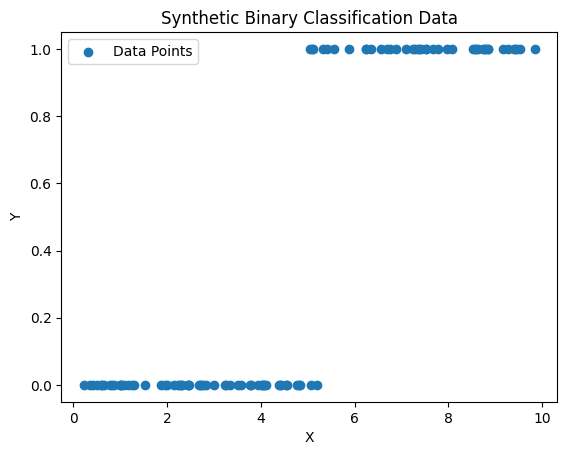

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X, Y, label='Data Points')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Synthetic Binary Classification Data')
ax.legend()
plt.show()

In [14]:
w, b, loss_history = train_logistic_regression(X, Y, learning_rate=0.1, epochs=200)

Epoch 0, Loss: 0.6931, w: 0.0829, b: -0.0080
Epoch 10, Loss: 0.6084, w: 0.1453, b: -0.2030
Epoch 20, Loss: 0.5719, w: 0.1762, b: -0.3906
Epoch 30, Loss: 0.5396, w: 0.2056, b: -0.5670
Epoch 40, Loss: 0.5110, w: 0.2334, b: -0.7331
Epoch 50, Loss: 0.4856, w: 0.2597, b: -0.8895
Epoch 60, Loss: 0.4629, w: 0.2847, b: -1.0373
Epoch 70, Loss: 0.4427, w: 0.3085, b: -1.1770
Epoch 80, Loss: 0.4245, w: 0.3311, b: -1.3095
Epoch 90, Loss: 0.4080, w: 0.3527, b: -1.4353
Epoch 100, Loss: 0.3932, w: 0.3733, b: -1.5549
Epoch 110, Loss: 0.3797, w: 0.3930, b: -1.6690
Epoch 120, Loss: 0.3674, w: 0.4119, b: -1.7779
Epoch 130, Loss: 0.3561, w: 0.4300, b: -1.8821
Epoch 140, Loss: 0.3458, w: 0.4474, b: -1.9820
Epoch 150, Loss: 0.3362, w: 0.4641, b: -2.0779
Epoch 160, Loss: 0.3274, w: 0.4803, b: -2.1700
Epoch 170, Loss: 0.3193, w: 0.4958, b: -2.2587
Epoch 180, Loss: 0.3117, w: 0.5109, b: -2.3442
Epoch 190, Loss: 0.3046, w: 0.5254, b: -2.4268


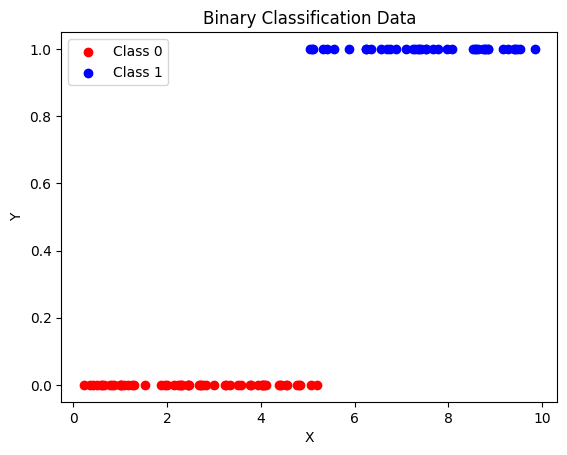

In [18]:
fig, ax = plt.subplots()

ax.scatter([x for x, y in zip(X, Y) if y == 0],
           [y for y in Y if y == 0],
           color='red', label='Class 0')

ax.scatter([x for x, y in zip(X, Y) if y == 1],
           [y for y in Y if y == 1],
           color='blue', label='Class 1')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Binary Classification Data')
ax.legend()
plt.show()


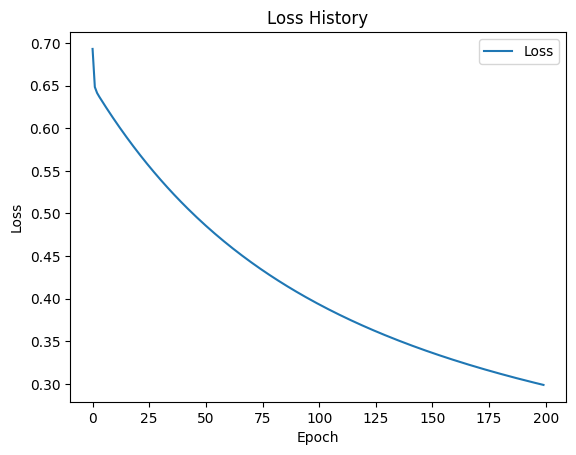

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([epoch for epoch, loss in loss_history], [loss for epoch, loss in loss_history], label='Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss History')
ax.legend()
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

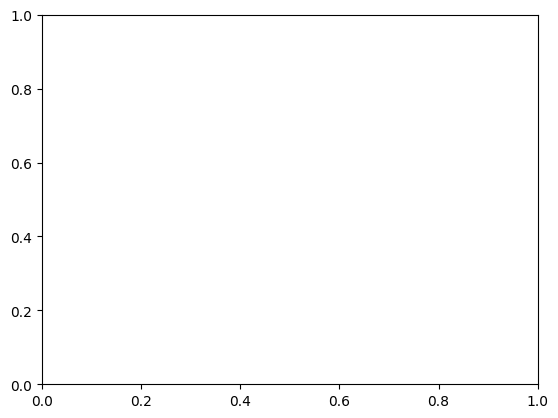

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(X, w * X + b, color='green', label='Decision Boundary')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Logistic Regression Decision Boundary')
ax.legend()
plt.show()
